# Evaluation of the occlusion sensitivity experiments
These Notebook evaluates the first try of occlusion sensitivity. A patch is occluded in the source and the generator separates the signal. This can be compared to the unperturbed generation. Based on the difference in the correlation coefficient, we defined a score to show which occluded patch has the most overall relevance. 

In [1]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.io import fits
from xai_dataloader import XAIDataLoader
from xai_calc import calc_importance
from xai_plot import plot_r_occ_sample, plot_perturbed_map, plot_occlusion_sensitivity, plot_diff_map

/usr/local/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


The next cell needs user input:

In [2]:
base_output_dir = "../output/" 
names = ['test', 'xai_exp_occlusion' ]
results_dir = "../output/xai_occlusion_results/"
nrun = 0
nindex = 1
#suffix_list = [ "run{:d}_index{:d}".format(i, j) for i in range(nrun) for j in range(nindex) ]
total_n_occ = 100
suffix=f"run86_index0" #what is wrong with run60_index0? 71

## Evaluation of single samples

Saved plot ../output/xai_occlusion_results//compare_occlusion_exp_run86_index0.png


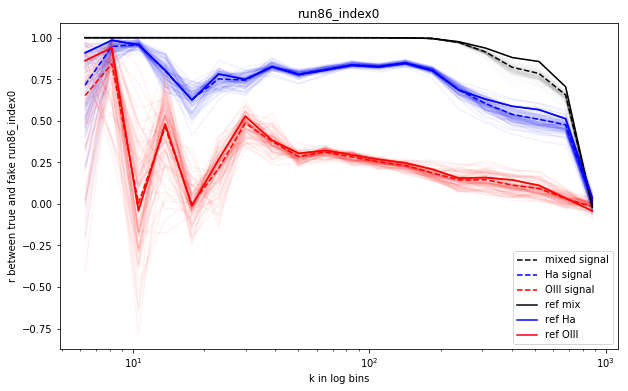

In [3]:
plot_r_occ_sample(base_output_dir, names[0], names[1], results_dir, total_n_occ, suffix)

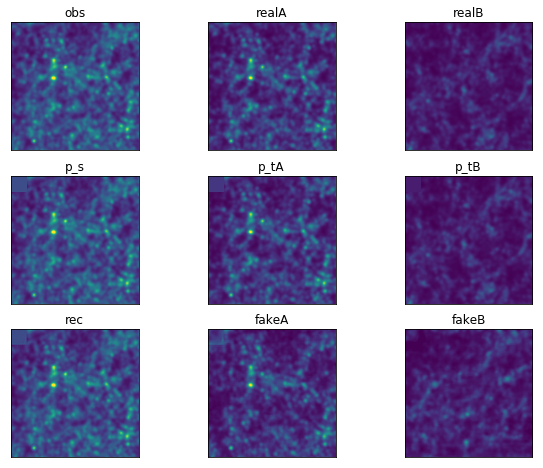

In [4]:
for i in range(1):
    df = XAIDataLoader(base_output_dir, names[1], suffix, n_occ=i)
    plot_perturbed_map(df, results_dir, names[1], n_occ=i, suffix=suffix)

In [37]:
def hplot_diff_map(data, results_dir, exp_name, n_occ=None, suffix=f"run0_index0"):
    """
    Expects input from the XAIDataLoader
    """
    df_fake = data.fake
    df_real = data.real
    if data.pert is not None:
        # In case that the source data was pertubed we want to see the perturbed
        # data instead of the original (real) data
        df_real = data.pert 
    
    #vmin = -2.0e-07
    #vmax = 2.0e-07
    vmin = 0
    vmax = 9.0e-08  
    #vmax = np.max(df_real['obs'].values[0])
    
    _, axs = plt.subplots(3,3, figsize=(12, 10))
    
    col = df_real.columns
    for i in range(len(col)):    
        ax = axs[0][int(i%3)]
        ax.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)
        ax.set_title(col[i])
        ax.imshow(df_real[col[i]].values[0], interpolation="none", vmin=vmin, vmax=vmax)

    col = df_fake.columns
    for i in range(len(col)):    
        ax = axs[1][int(i%3)]
        ax.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)
        ax.set_title(col[i])
        ax.imshow(df_fake[col[i]].values[0], interpolation="none", vmin=vmin, vmax=vmax)

    # Create a diverging color map centered around zero
    cmap = plt.get_cmap('coolwarm')
    rcol = df_real.columns
    fcol = df_fake.columns
    for i in range(len(col)):    
        ax = axs[2][int(i%3)]
        ax.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)
        ax.set_title(col[i])
        delta = df_real[rcol[i]].values[0] - df_fake[fcol[i]].values[0]
        im = ax.imshow(delta, interpolation="none", cmap=cmap)
        cbar = plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.05, aspect=10, shrink=0.6)
        cbar.set_label('Difference')
    
    
    if n_occ is not None:
        filename =f"diff_map_{suffix}_{exp_name}_occluded{n_occ}_image.png"    
    else:
        filename =f"{exp_name}_{suffix}_image.png"
    save_path = os.path.join(results_dir, filename)    
    plt.savefig(save_path) 
    plt.show()
    plt.close()

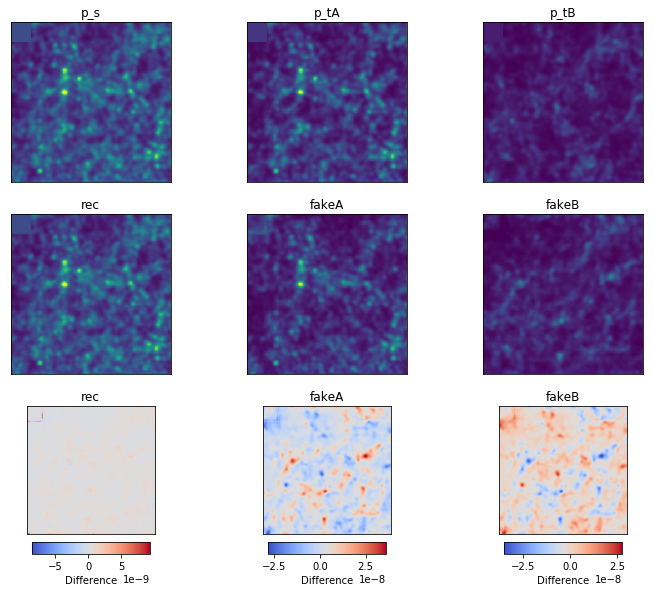

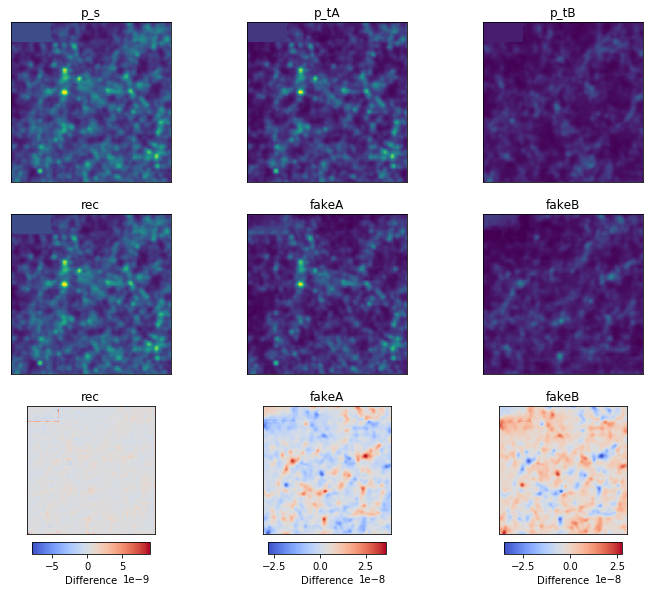

In [38]:
for i in range(2):
    df = XAIDataLoader(base_output_dir, names[1], suffix, n_occ=i)
    hplot_diff_map(df, results_dir, names[1], n_occ=i, suffix=suffix)

Saved plot ../output/xai_occlusion_results/occlusion_sensitivity_imagerun86_index0large.png


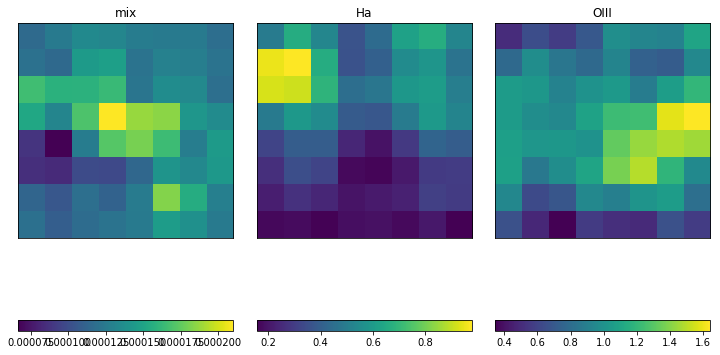

In [6]:
im_mix, im_ha, im_oiii = calc_importance(base_output_dir, names[0], names[1], total_n_occ, suffix, sscale='large',
                                         stride=32, nbins=20, log_bins=True)
plot_occlusion_sensitivity(im_mix, im_ha, im_oiii, results_dir, sscale=suffix+'large')    

I am not sure about this plot. The problem is that we occluded the inner pixels many times more often so I assume they have more impact on the absolute number. I think the pattern arises mainly from the occlusion rather than the underlying signal. Not convincing at this moment!
Focussing on the large scale structure certainly helped a bit but maybe here it is worth looking at good and bad examples. I know from my previous results that the model performs bad on "run71_index0".